In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
from sklearn.utils import resample
pio.renderers.default='plotly_mimetype+notebook_connected'
import warnings
warnings.filterwarnings('ignore')

In [12]:
wb=pd.read_csv("Data/WBnew.csv")
wb.columns.values[-20:]=wb.columns[-20:].str[:-9]
wb=wb.dropna()
def mp(x):
    years=[]
    for i in range (2005, 2025):
        x[str(i)]=pd.to_numeric(x[str(i)], errors='coerce')
        years.append(str(i))
    x=pd.melt(x, id_vars=['Country Name','Series Name'], value_vars=years, var_name='Year', value_name='Value')
    x=x.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
    return x
wb=mp(wb)
wb.head()

Series Name,Country Name,Year,GDP per capita (current US$),"Hospital beds (per 1,000 people)",Income share held by highest 10%,"Life expectancy at birth, total (years)",Net migration,Real interest rate (%),Researchers in R&D (per million people),Secure Internet servers (per 1 million people)
0,Afghanistan,2005,254.184249,0.42,NaN,58.247,250971.0,NaN,NaN,NaN
1,Afghanistan,2006,274.218554,0.42,NaN,58.553,57673.0,10.046897,NaN,NaN
2,Afghanistan,2007,376.223152,0.42,NaN,58.956,-851298.0,-3.585111,NaN,NaN
3,Afghanistan,2008,381.733238,0.42,NaN,59.708,215753.0,12.557960,NaN,NaN
4,Afghanistan,2009,452.053705,0.42,NaN,60.248,-60602.0,17.542929,NaN,NaN


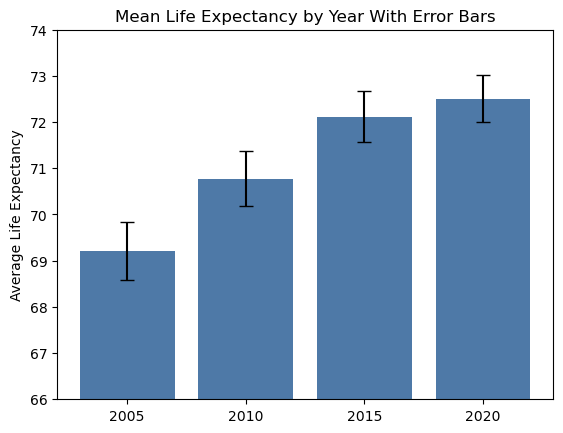

In [49]:
years=["2005", "2010", "2015", "2020"]
means=[]
se=[]
for i in years:
    values=wb[wb["Year"]==i]["Life expectancy at birth, total (years)"]
    means.append(values.mean())
    se.append(values.std(ddof=1)/np.sqrt(len(values)))

plt.bar(years, means, yerr=se, capsize=5, color='#4e79a7')
plt.title('Mean Life Expectancy by Year With Error Bars')
plt.ylabel('Average Life Expectancy')
plt.ylim(66, 74)
plt.show()

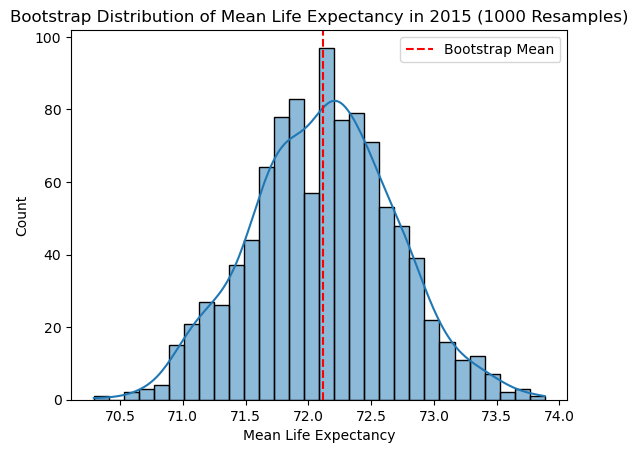

In [64]:
values2015=wb[wb["Year"]=="2015"]["Life expectancy at birth, total (years)"]
means=[]
for i in range(1000):
    sample=resample(values2015, random_state=i)
    means.append(sample.mean())

sns.histplot(means, kde=True, bins=30)
plt.axvline(np.mean(means), color='r', linestyle='--', label="Bootstrap Mean")
plt.title("Bootstrap Distribution of Mean Life Expectancy in 2015 (1000 Resamples)")
plt.xlabel("Mean Life Expectancy")
plt.legend()
plt.show()

### Reflection:
* The bar chart with error bars proves that there is some variance between countries in every year. This may cause issues when evaluating the results of a visauliztion for this dataset since there is always a degree of uncertainty present in the sample. 
* Looking at the bootstrap distribution of average life expectancy in 2015, it is clear that the dataset does not perfectly follow Gaussian distribution. Although the KDE line outlines a distrubition close to what would be considered normal, there are clearly some points in the data that would not allign with a sample of equal variance.
* While uncertainty is not a desired factor when conducting research, it can be very useful to measure the variance present in a dataset as it allows for a better understanding of the data and the results from analyses. By capturing the uncertainty within a predictor, we can represent our findings with more accuracy through explanations of how the variance affects a given model.
    * For example, instead of concluding that life expectancy increases over 5 year intervals, we can also say that most countries fall between +/- 0.6 years of the average life expectancy in a given year.
    * Futhermore, we can state that the standard error does not fluctuate much between any given year, and this tells us that changes in life expectancy are consistant across all nations represented in the dataset.
* Overall, by quantifying the underlying uncertainty in our datasets, we can have a more detailed interpretation of our results as we account for variance, and this will allow us to report better results with confidence.